In [ ]:
# Analysis
import numpy as np
from numpy import loadtxt
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import seaborn as sns

# Hypothesis Testing
from scipy.stats import randint, ttest_ind, chi2_contingency
from scipy import stats

In [ ]:
# Import Dataset
df_taxi = pd.read_csv("/content/Taxi_Data.csv")
df_custID = pd.read_csv("/content/Customer_ID.csv")
df_tranID = pd.read_csv("/content/Transaction_ID.csv")
df_city = pd.read_csv("/content/City.csv")

# Merge Dataset
# Merge taxi data with transaction data on "Transaction ID"
df0 = pd.merge(df_taxi, df_tranID, on="Transaction ID", how="inner")

# Merge the result with customer data on "Customer ID"
df = pd.merge(df0, df_custID, on="Customer ID", how="inner")

# After combine, drop "Transaction ID" and "Customer ID" columns
df.drop(columns=["Transaction ID", "Customer ID"], inplace=True)
df

Date of Travel     Company           City  Distance Travelled(KM)  \
0                42377    Pink Cab     ATLANTA GA                   30.45   
1                42375    Pink Cab     ATLANTA GA                   28.62   
2                42371    Pink Cab     ATLANTA GA                    9.04   
3                42376    Pink Cab     ATLANTA GA                   33.17   
4                42372    Pink Cab     ATLANTA GA                    8.73   
...                ...         ...            ...                     ...   
359387           43108  Yellow Cab  WASHINGTON DC                    4.80   
359388           43104  Yellow Cab  WASHINGTON DC                    8.40   
359389           43105  Yellow Cab  WASHINGTON DC                   27.75   
359390           43105  Yellow Cab  WASHINGTON DC                    8.80   
359391           43102  Yellow Cab  WASHINGTON DC                   12.76   

        Price Charged  Cost of Trip Payment_Mode Gender  Age  \
0              370.95      313.6350         Card   Male   28   
1              358.52      334.8540         Card   Male   27   
2              125.20       97.6320         Cash   Male   53   
3              377.40      351.6020         Cash   Male   23   
4              114.62       97.7760         Card   Male   33   
...               ...           ...          ...    ...  ...   
359387          69.24       63.3600         Cash   Male   24   
359388         113.75      106.8480         Cash   Male   32   
359389         437.07      349.6500         Cash   Male   56   
359390         146.19      114.0480         Card   Male   32   
359391         191.58      177.6192         Card   Male   20   

        Income (USD/Month)  
0                    10813  
1                     9237  
2                    11242  
3                    23327  
4                     8536  
...                    ...  
359387               15651  
359388                6528  
359389                7966  
359390                6423  
359391               11284  

[359392 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date of Travel          359392 non-null  int64  
 1   Company                 359392 non-null  object 
 2   City                    359392 non-null  object 
 3   Distance Travelled(KM)  359392 non-null  float64
 4   Price Charged           359392 non-null  float64
 5   Cost of Trip            359392 non-null  float64
 6   Payment_Mode            359392 non-null  object 
 7   Gender                  359392 non-null  object 
 8   Age                     359392 non-null  int64  
 9   Income (USD/Month)      359392 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 27.4+ MB


In [ ]:
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"], unit="D", origin="1899-12-30")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date of Travel          359392 non-null  datetime64[ns]
 1   Company                 359392 non-null  object        
 2   City                    359392 non-null  object        
 3   Distance Travelled(KM)  359392 non-null  float64       
 4   Price Charged           359392 non-null  float64       
 5   Cost of Trip            359392 non-null  float64       
 6   Payment_Mode            359392 non-null  object        
 7   Gender                  359392 non-null  object        
 8   Age                     359392 non-null  int64         
 9   Income (USD/Month)      359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 27.4+ MB


In [ ]:
df

Date of Travel     Company           City  Distance Travelled(KM)  \
0          2016-01-08    Pink Cab     ATLANTA GA                   30.45   
1          2016-01-06    Pink Cab     ATLANTA GA                   28.62   
2          2016-01-02    Pink Cab     ATLANTA GA                    9.04   
3          2016-01-07    Pink Cab     ATLANTA GA                   33.17   
4          2016-01-03    Pink Cab     ATLANTA GA                    8.73   
...               ...         ...            ...                     ...   
359387     2018-01-08  Yellow Cab  WASHINGTON DC                    4.80   
359388     2018-01-04  Yellow Cab  WASHINGTON DC                    8.40   
359389     2018-01-05  Yellow Cab  WASHINGTON DC                   27.75   
359390     2018-01-05  Yellow Cab  WASHINGTON DC                    8.80   
359391     2018-01-02  Yellow Cab  WASHINGTON DC                   12.76   

        Price Charged  Cost of Trip Payment_Mode Gender  Age  \
0              370.95      313.6350         Card   Male   28   
1              358.52      334.8540         Card   Male   27   
2              125.20       97.6320         Cash   Male   53   
3              377.40      351.6020         Cash   Male   23   
4              114.62       97.7760         Card   Male   33   
...               ...           ...          ...    ...  ...   
359387          69.24       63.3600         Cash   Male   24   
359388         113.75      106.8480         Cash   Male   32   
359389         437.07      349.6500         Cash   Male   56   
359390         146.19      114.0480         Card   Male   32   
359391         191.58      177.6192         Card   Male   20   

        Income (USD/Month)  
0                    10813  
1                     9237  
2                    11242  
3                    23327  
4                     8536  
...                    ...  
359387               15651  
359388                6528  
359389                7966  
359390                6423  
359391               11284  

[359392 rows x 10 columns]

In [ ]:
df.duplicated().sum()


0

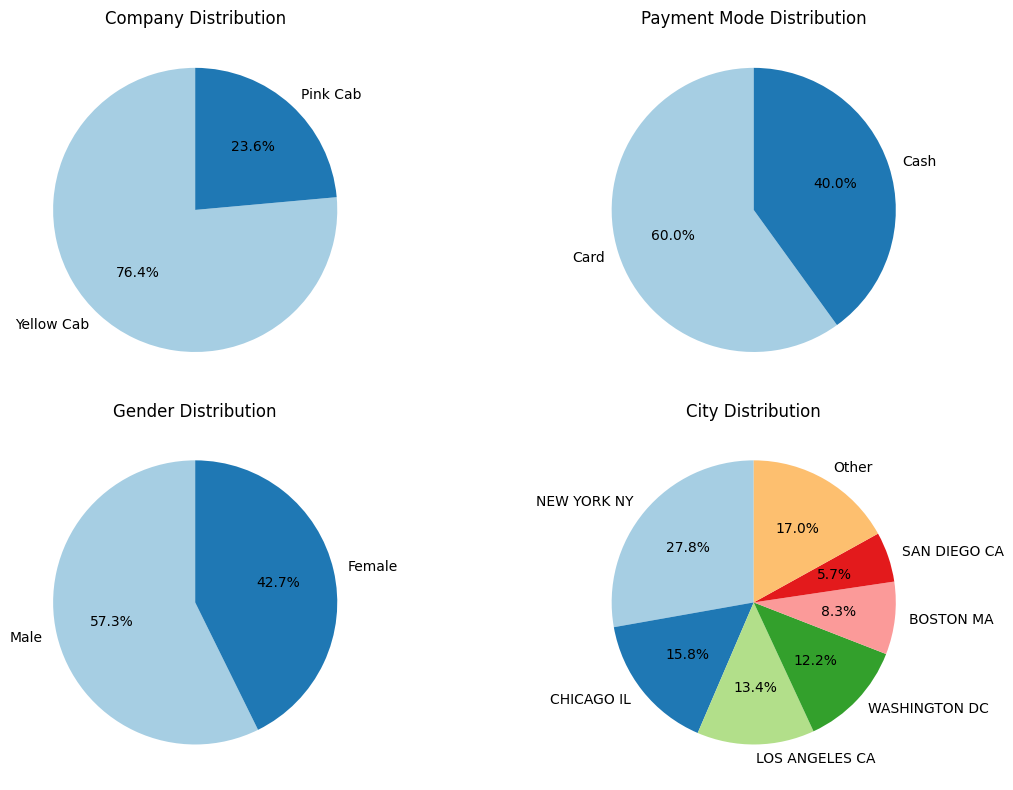

In [ ]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
colors = plt.get_cmap("Paired").colors

# Pie chart for 'Company' value counts
company_counts = df["Company"].value_counts()
axs[0, 0].pie(company_counts, labels=company_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[0, 0].set_title("Company Distribution")

# Pie chart for 'Payment_Mode' value counts
payment_counts = df["Payment_Mode"].value_counts()
axs[0, 1].pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[0, 1].set_title("Payment Mode Distribution")

# Pie chart for 'Gender' value counts
gender_counts = df["Gender"].value_counts()
axs[1, 0].pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[1, 0].set_title("Gender Distribution")

# Pie chart for 'City' value counts (Top N cities)
top_cities = 6
city_counts = df["City"].value_counts().nlargest(top_cities)
city_counts["Other"] = df["City"].value_counts()[top_cities:].sum()
axs[1, 1].pie(city_counts, labels=city_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[1, 1].set_title("City Distribution")

# Adjust layout
plt.tight_layout()
plt.show()

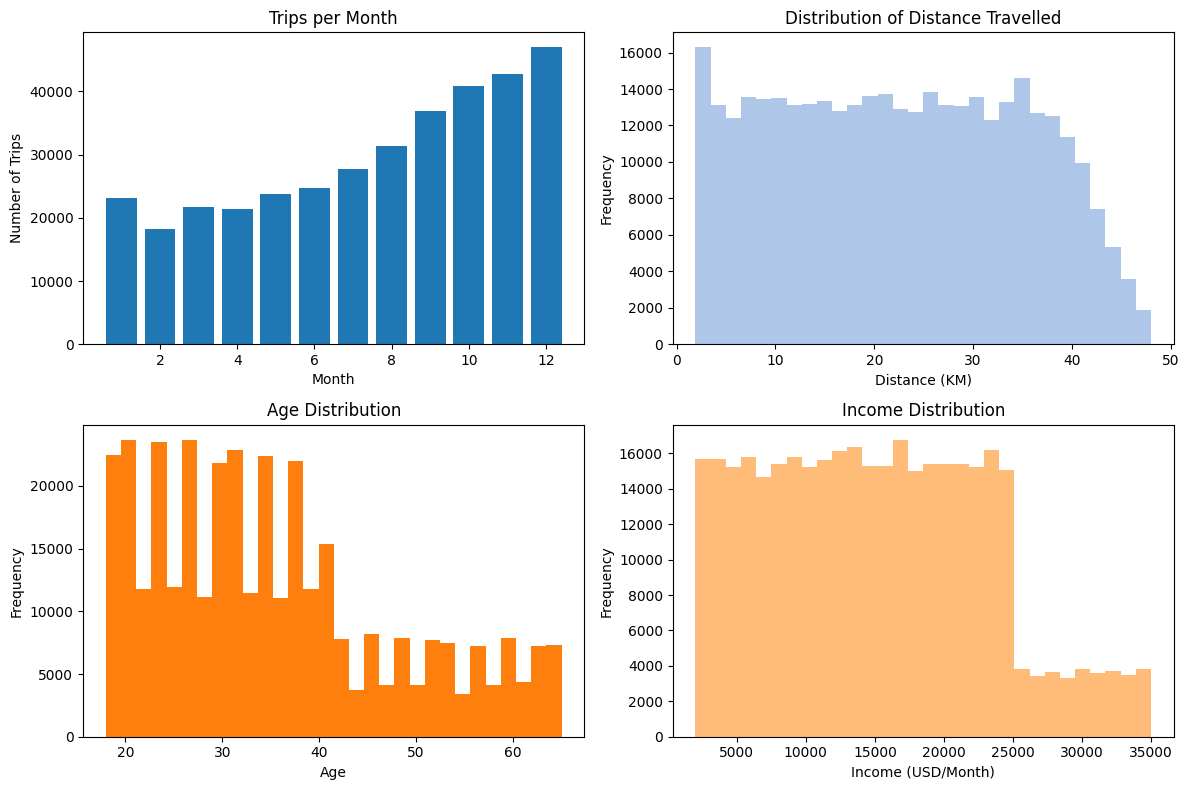

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
color_scheme = plt.get_cmap("tab20").colors

# Plot for "Date of Travel" by month
df_month = df.copy()
df_month["Month"] = pd.to_datetime(df["Date of Travel"]).dt.month
month_counts = df_month["Month"].value_counts().sort_index()
axs[0, 0].bar(month_counts.index, month_counts.values, color=to_hex(color_scheme[0]))
axs[0, 0].set_title("Trips per Month")
axs[0, 0].set_xlabel("Month")
axs[0, 0].set_ylabel("Number of Trips")

# Histogram for "Distance Travelled(KM)"
axs[0, 1].hist(df["Distance Travelled(KM)"], bins=30, color=to_hex(color_scheme[1]))
axs[0, 1].set_title("Distribution of Distance Travelled")
axs[0, 1].set_xlabel("Distance (KM)")
axs[0, 1].set_ylabel("Frequency")

# Histogram for "Age"
axs[1, 0].hist(df["Age"], bins=30, color=to_hex(color_scheme[2]))
axs[1, 0].set_title("Age Distribution")
axs[1, 0].set_xlabel("Age")
axs[1, 0].set_ylabel("Frequency")

# Histogram for "Income (USD/Month)"
axs[1, 1].hist(df["Income (USD/Month)"], bins=30, color=to_hex(color_scheme[3]))
axs[1, 1].set_title("Income Distribution")
axs[1, 1].set_xlabel("Income (USD/Month)")
axs[1, 1].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]
df["Profit"]

0         57.3150
1         23.6660
2         27.5680
3         25.7980
4         16.8440
           ...   
359387     5.8800
359388     6.9020
359389    87.4200
359390    32.1420
359391    13.9608
Name: Profit, Length: 359392, dtype: float64

In [ ]:
df


Date of Travel     Company           City  Distance Travelled(KM)  \
0          2016-01-08    Pink Cab     ATLANTA GA                   30.45   
1          2016-01-06    Pink Cab     ATLANTA GA                   28.62   
2          2016-01-02    Pink Cab     ATLANTA GA                    9.04   
3          2016-01-07    Pink Cab     ATLANTA GA                   33.17   
4          2016-01-03    Pink Cab     ATLANTA GA                    8.73   
...               ...         ...            ...                     ...   
359387     2018-01-08  Yellow Cab  WASHINGTON DC                    4.80   
359388     2018-01-04  Yellow Cab  WASHINGTON DC                    8.40   
359389     2018-01-05  Yellow Cab  WASHINGTON DC                   27.75   
359390     2018-01-05  Yellow Cab  WASHINGTON DC                    8.80   
359391     2018-01-02  Yellow Cab  WASHINGTON DC                   12.76   

        Price Charged  Cost of Trip Payment_Mode Gender  Age  \
0              370.95      313.6350         Card   Male   28   
1              358.52      334.8540         Card   Male   27   
2              125.20       97.6320         Cash   Male   53   
3              377.40      351.6020         Cash   Male   23   
4              114.62       97.7760         Card   Male   33   
...               ...           ...          ...    ...  ...   
359387          69.24       63.3600         Cash   Male   24   
359388         113.75      106.8480         Cash   Male   32   
359389         437.07      349.6500         Cash   Male   56   
359390         146.19      114.0480         Card   Male   32   
359391         191.58      177.6192         Card   Male   20   

        Income (USD/Month)   Profit  
0                    10813  57.3150  
1                     9237  23.6660  
2                    11242  27.5680  
3                    23327  25.7980  
4                     8536  16.8440  
...                    ...      ...  
359387               15651   5.8800  
359388                6528   6.9020  
359389                7966  87.4200  
359390                6423  32.1420  
359391               11284  13.9608  

[359392 rows x 11 columns]

from matplotlib import pyplot as plt
df['Distance Travelled(KM)'].plot(kind='hist', bins=20, title='Distance Travelled(KM)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Price Charged'].plot(kind='hist', bins=20, title='Price Charged')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Cost of Trip'].plot(kind='hist', bins=20, title='Cost of Trip')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Company').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Payment_Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Distance Travelled(KM)', y='Price Charged', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Price Charged', y='Cost of Trip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Cost of Trip', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Income (USD/Month)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Travel']
  ys = series['Distance Travelled(KM)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date of Travel', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Travel')
_ = plt.ylabel('Distance Travelled(KM)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Travel']
  ys = series['Distance Travelled(KM)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date of Travel', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Payment_Mode')):
  _plot_series(series, series_name, i)
  fig.legend(title='Payment_Mode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Travel')
_ = plt.ylabel('Distance Travelled(KM)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Travel']
  ys = series['Distance Travelled(KM)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date of Travel', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Travel')
_ = plt.ylabel('Distance Travelled(KM)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Travel']
  ys = series['Price Charged']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date of Travel', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Travel')
_ = plt.ylabel('Price Charged')

from matplotlib import pyplot as plt
df['Distance Travelled(KM)'].plot(kind='line', figsize=(8, 4), title='Distance Travelled(KM)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Price Charged'].plot(kind='line', figsize=(8, 4), title='Price Charged')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Cost of Trip'].plot(kind='line', figsize=(8, 4), title='Cost of Trip')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Payment_Mode'].value_counts()
    for x_label, grp in df.groupby('Company')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Company')
_ = plt.ylabel('Payment_Mode')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in df.groupby('Payment_Mode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Payment_Mode')
_ = plt.ylabel('Gender')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Distance Travelled(KM)', y='Company', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Payment_Mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Distance Travelled(KM)', y='Payment_Mode', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Distance Travelled(KM)', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Price Charged', y='Company', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Distance Travelled(KM)'].plot(kind='hist', bins=20, title='Distance Travelled(KM)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Price Charged'].plot(kind='hist', bins=20, title='Price Charged')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Cost of Trip'].plot(kind='hist', bins=20, title='Cost of Trip')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Company').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Payment_Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='Distance Travelled(KM)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Distance Travelled(KM)', y='Price Charged', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Price Charged', y='Cost of Trip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Cost of Trip', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Travel']
  ys = series['Distance Travelled(KM)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date of Travel', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Travel')
_ = plt.ylabel('Distance Travelled(KM)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Travel']
  ys = series['Distance Travelled(KM)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Date of Travel', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Payment_Mode')):
  _plot_series(series, series_name, i)
  fig.legend(title='Payment_Mode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Travel')
_ = plt.ylabel('Distance Travelled(KM)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Travel']
  ys = series['Distance Travelled(KM)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Date of Travel', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Travel')
_ = plt.ylabel('Distance Travelled(KM)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Travel']
  ys = series['Price Charged']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Date of Travel', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Travel')
_ = plt.ylabel('Price Charged')

from matplotlib import pyplot as plt
_df_15['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Distance Travelled(KM)'].plot(kind='line', figsize=(8, 4), title='Distance Travelled(KM)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Price Charged'].plot(kind='line', figsize=(8, 4), title='Price Charged')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Cost of Trip'].plot(kind='line', figsize=(8, 4), title='Cost of Trip')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Payment_Mode'].value_counts()
    for x_label, grp in _df_19.groupby('Company')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Company')
_ = plt.ylabel('Payment_Mode')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in _df_20.groupby('Payment_Mode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Payment_Mode')
_ = plt.ylabel('Gender')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='index', y='Company', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Payment_Mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='index', y='Payment_Mode', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='index', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Distance Travelled(KM)', y='Company', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

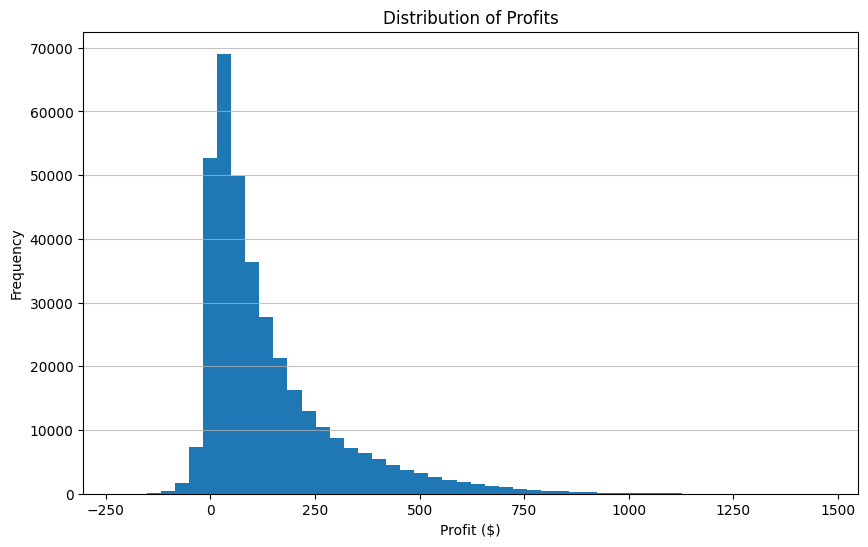

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["Profit"], bins=50)
plt.title("Distribution of Profits")
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show()

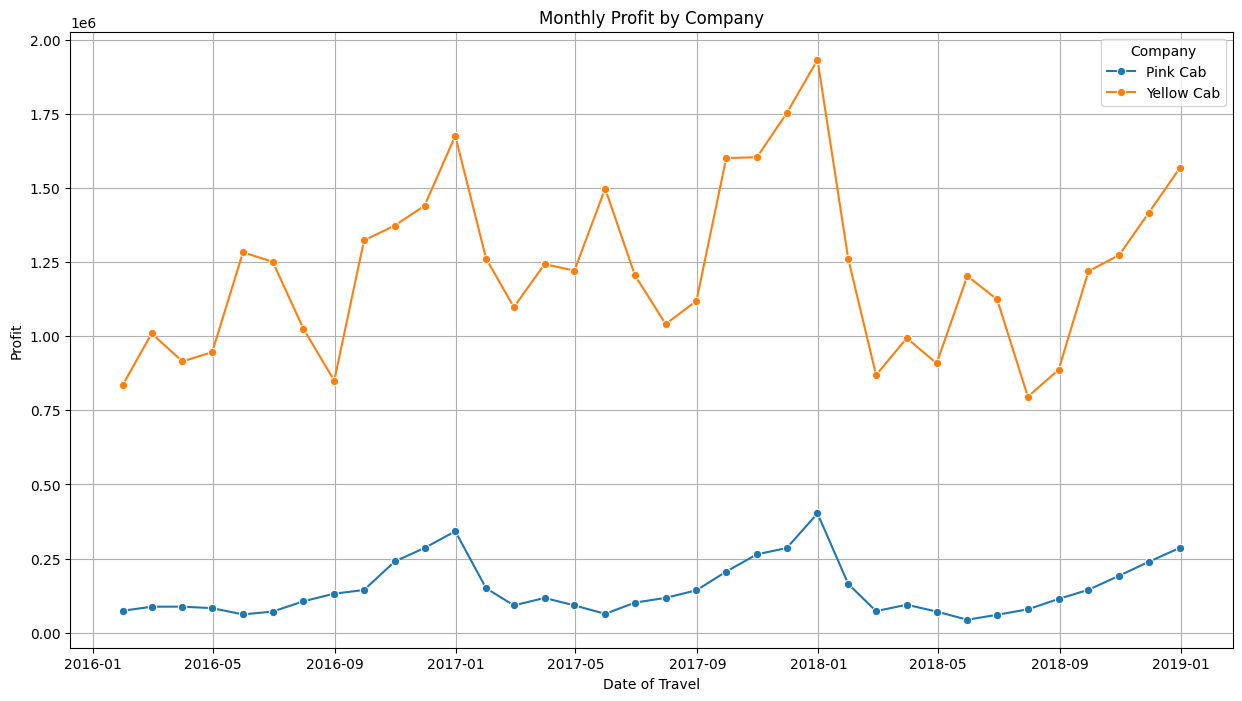

In [ ]:
df_month_profit = df.copy()
df_month_profit.set_index("Date of Travel", inplace=True)
monthly_profit = df_month_profit.groupby("Company").resample("ME")["Profit"].sum()
monthly_profit = monthly_profit.reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x="Date of Travel", y="Profit", hue="Company", data=monthly_profit, marker="o")

plt.title("Monthly Profit by Company")
plt.xlabel("Date of Travel")
plt.ylabel("Profit")
plt.legend(title="Company")
plt.grid(True)
plt.show()

<ipython-input-38-27c49d1ee1c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="City", data=profit_by_city, palette="viridis")


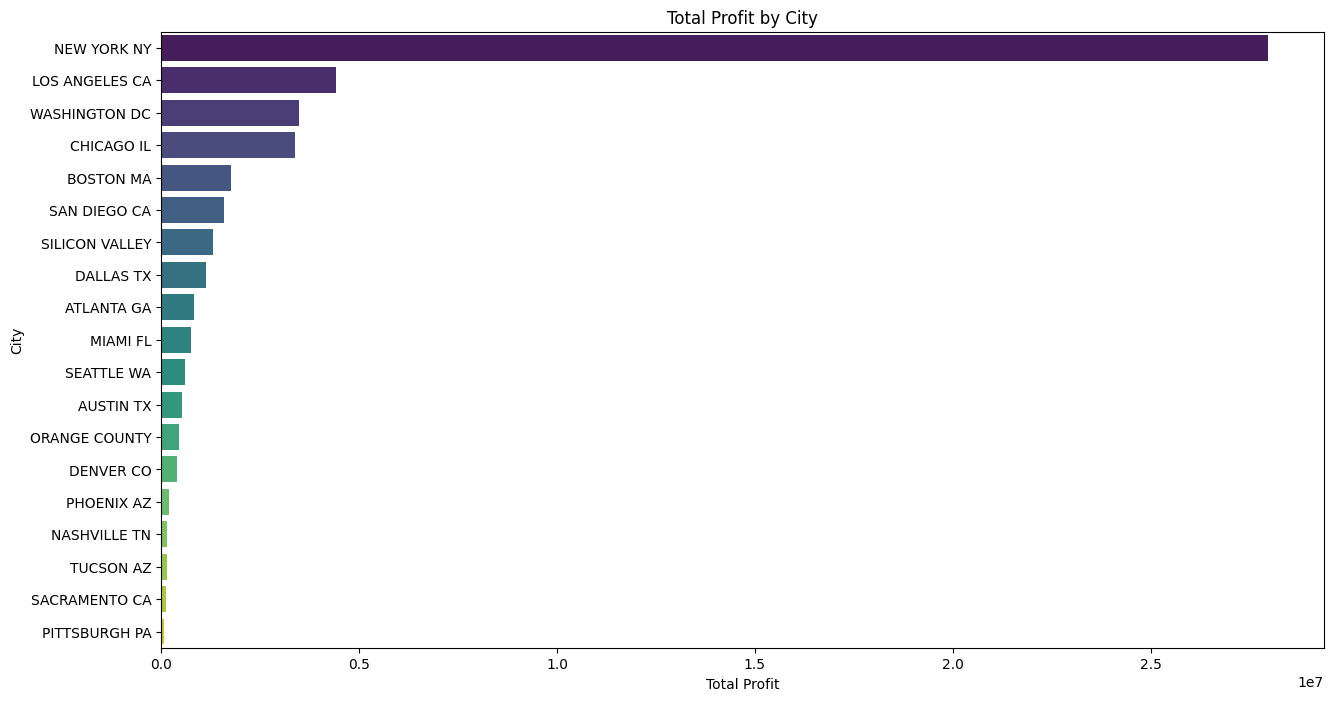

In [ ]:
profit_by_city = df.groupby("City")["Profit"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x="Profit", y="City", data=profit_by_city, palette="viridis")
plt.title("Total Profit by City")
plt.xlabel("Total Profit")
plt.ylabel("City")
plt.show();

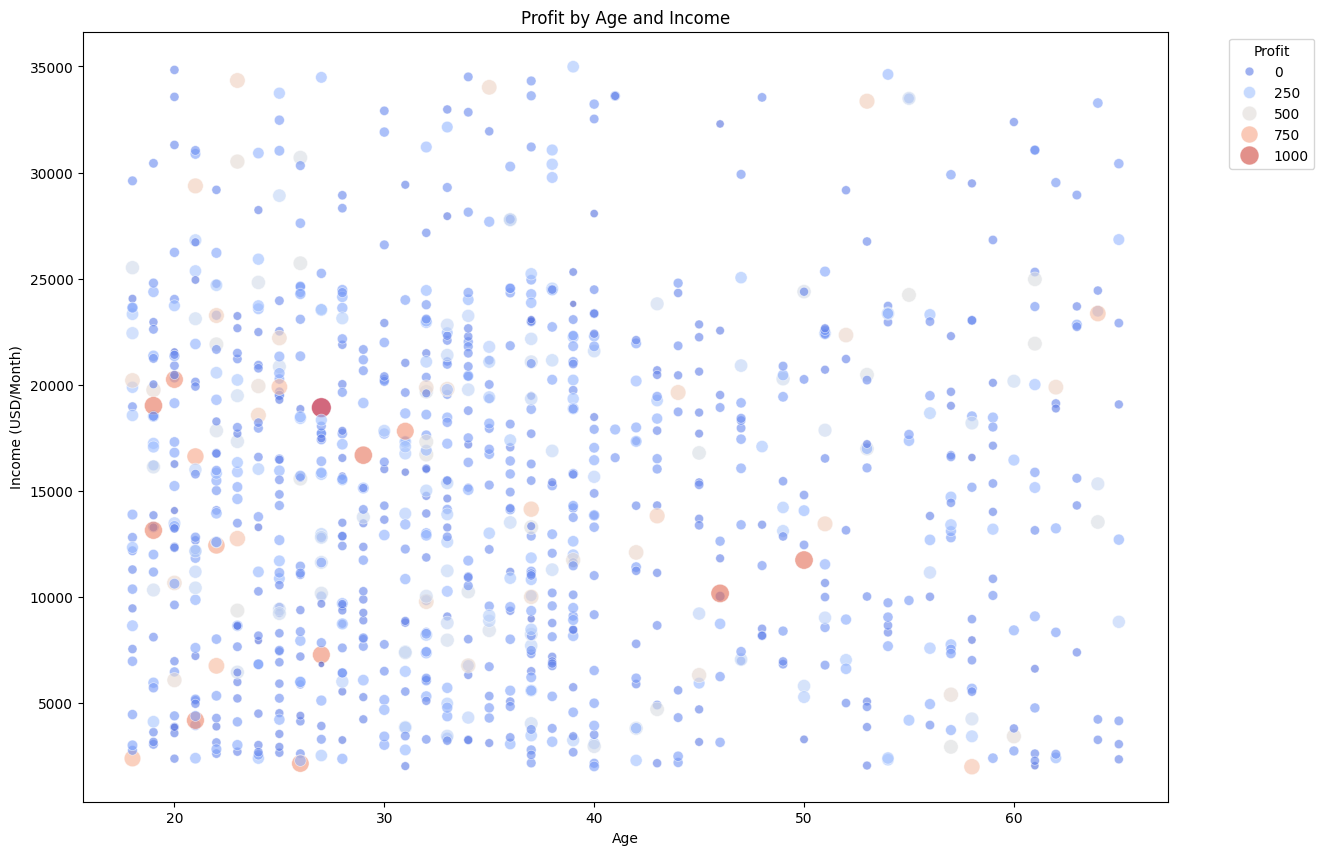

In [ ]:
# Sample the data to make the plot more readable
df_sampled = df.sample(n=1000, random_state=1)

# Plot
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=df_sampled, x="Age", y="Income (USD/Month)", size="Profit",
                          hue="Profit", palette="coolwarm", sizes=(20, 200), alpha=0.6)

plt.title("Profit by Age and Income")
plt.xlabel("Age")
plt.ylabel("Income (USD/Month)")
plt.legend(title="Profit", bbox_to_anchor=(1.05, 1), loc='upper left')

handles, labels = scatter.get_legend_handles_labels()
plt.show()

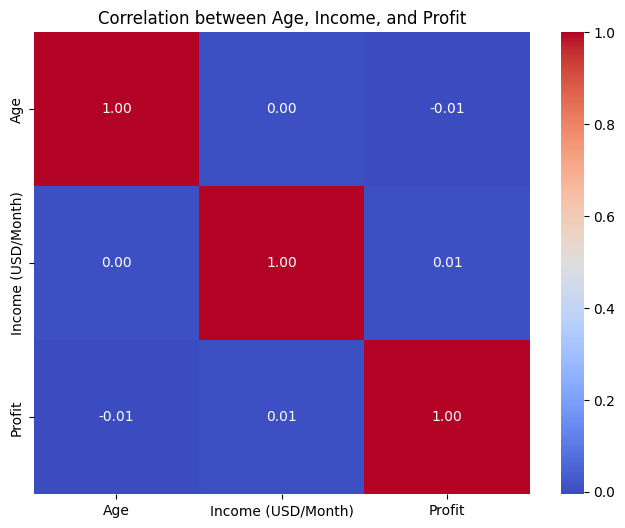

Correlation of Profit with Age: -0.005092963667619376
Correlation of Profit with Income: 0.006148297768292395


In [ ]:
# Ensure Age, Income, and Profit columns exist
if 'Age' in df.columns and 'Income (USD/Month)' in df.columns and 'Profit' in df.columns:
    # Compute correlation matrix
    correlation_matrix = df[['Age', 'Income (USD/Month)', 'Profit']].corr()

    # Display correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation between Age, Income, and Profit")
    plt.show()

    # Print correlation values
    print("Correlation of Profit with Age:", correlation_matrix.loc["Profit", "Age"])
    print("Correlation of Profit with Income:", correlation_matrix.loc["Profit", "Income (USD/Month)"])
else:
    print("Required columns ('Age', 'Income (USD/Month)', 'Profit') not found in the dataset.")


<ipython-input-41-47d763d49b0f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_profit_by_distance = df_bins.groupby("Distance Bin")["Profit"].mean().reset_index()
<ipython-input-41-47d763d49b0f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_profit_by_distance, x="Distance Bin", y="Profit", palette="coolwarm")


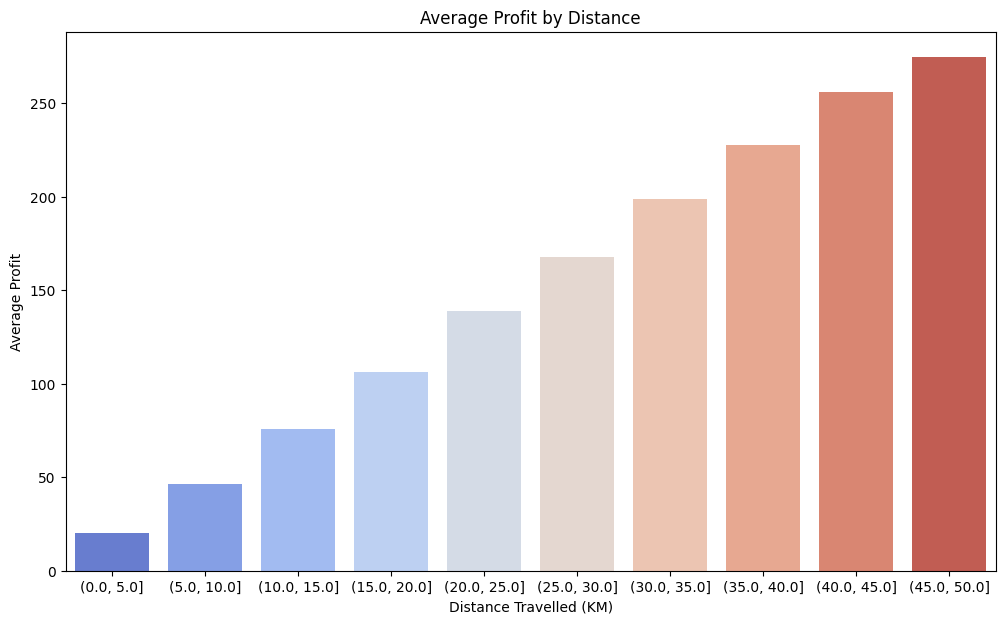

In [ ]:
distance_bins = np.arange(0, df["Distance Travelled(KM)"].max() + 5, 5)
df_bins = df.copy()
df_bins["Distance Bin"] = pd.cut(df["Distance Travelled(KM)"], bins=distance_bins)

# Calculate average profit for each distance bin
avg_profit_by_distance = df_bins.groupby("Distance Bin")["Profit"].mean().reset_index()

# Convert distance bin to string for plotting
avg_profit_by_distance["Distance Bin"] = avg_profit_by_distance["Distance Bin"].astype(str)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_profit_by_distance, x="Distance Bin", y="Profit", palette="coolwarm")
plt.title("Average Profit by Distance")
plt.xlabel("Distance Travelled (KM)")
plt.ylabel("Average Profit")
plt.show();

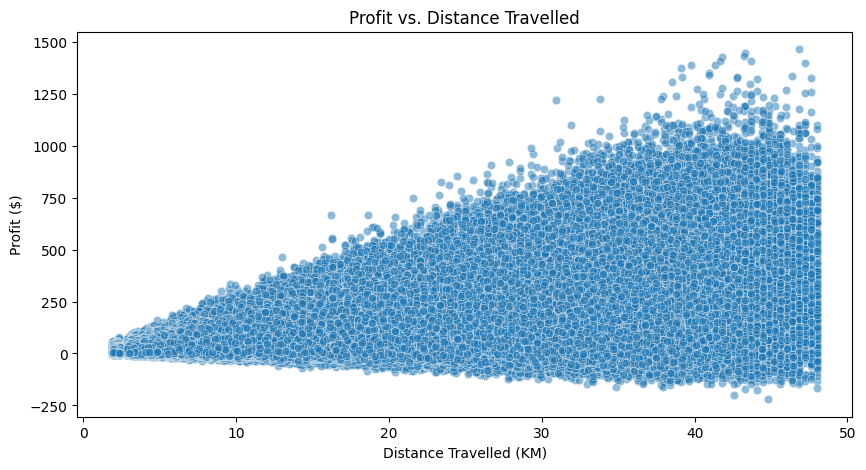

Correlation between Distance and Profit: 0.4627681978971095


In [ ]:
# Scatter plot of Profit vs. Distance
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Distance Travelled(KM)", y="Profit", alpha=0.5)
plt.xlabel("Distance Travelled (KM)")
plt.ylabel("Profit ($)")
plt.title("Profit vs. Distance Travelled")
plt.show()

# Correlation between Distance and Profit
correlation_distance_profit = df["Distance Travelled(KM)"].corr(df["Profit"])
print(f"Correlation between Distance and Profit: {correlation_distance_profit}")


<ipython-input-43-d9d8577edc6a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Market Penetration", data=df_city_sorted, palette=custom_colors)
<ipython-input-43-d9d8577edc6a>:13: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="City", y="Market Penetration", data=df_city_sorted, palette=custom_colors)


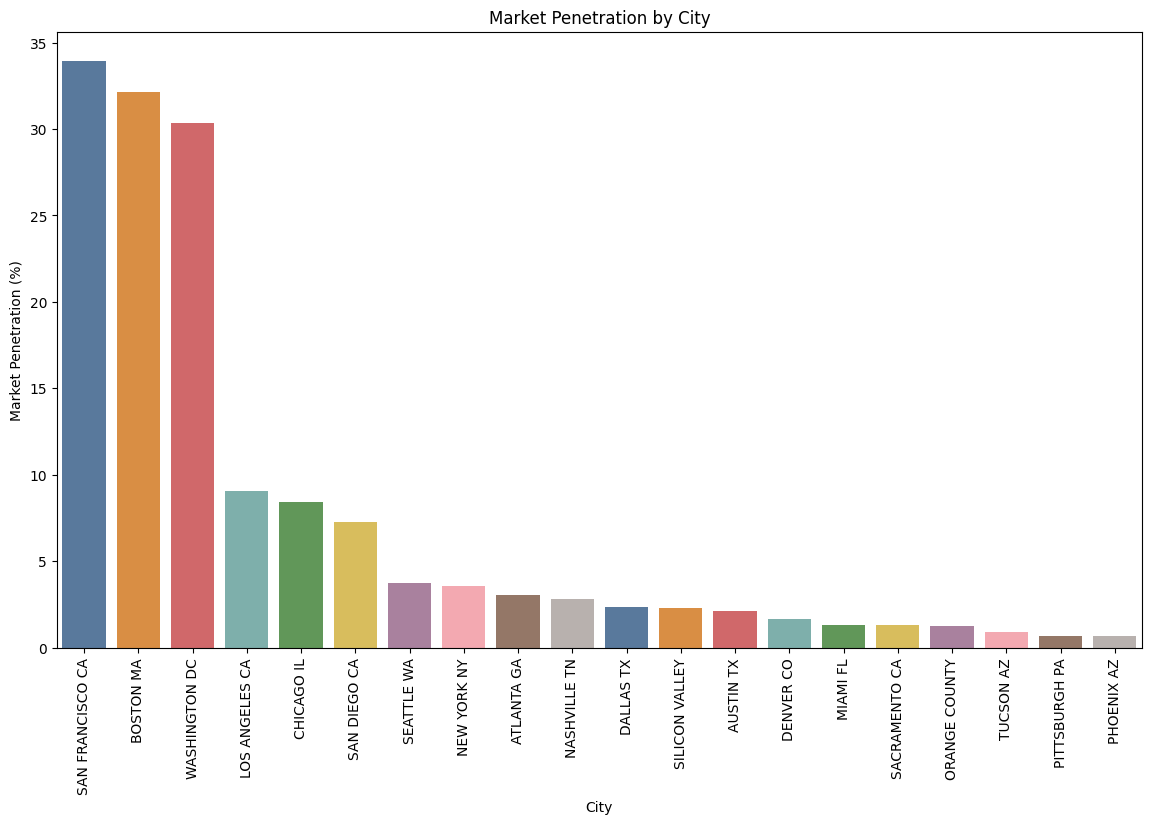

In [ ]:
df_city["Population"] = df_city["Population"].str.replace(",", "").astype(int)
df_city["Users"] = df_city["Users"].str.replace(",", "").astype(int)

# Calculate market penetration as the percentage of users in the population
df_city["Market Penetration"] = (df_city["Users"] / df_city["Population"]) * 100

# Sort by market penetration
df_city_sorted = df_city.sort_values("Market Penetration", ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
custom_colors = ["#4e79a7", "#f28e2b", "#e15759", "#76b7b2", "#59a14f", "#edc948", "#b07aa1", "#ff9da7", "#9c755f", "#bab0ac"]
sns.barplot(x="City", y="Market Penetration", data=df_city_sorted, palette=custom_colors)
plt.xticks(rotation=90)
plt.title("Market Penetration by City")
plt.xlabel("City")
plt.ylabel("Market Penetration (%)")
plt.show();

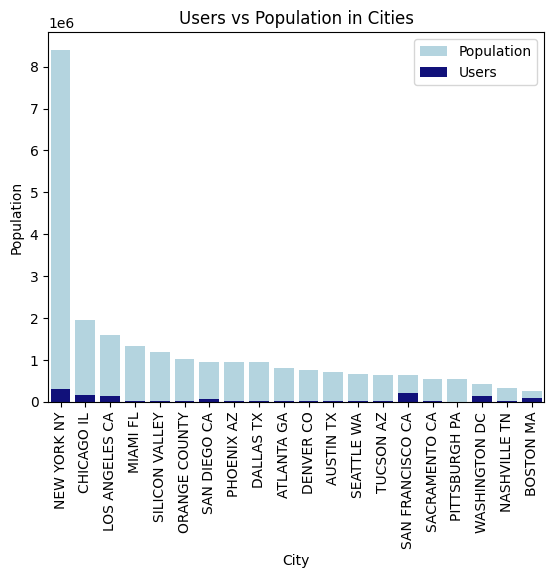

In [ ]:
sns.barplot(x="City", y="Population", data=df_city, color="lightblue", label="Population")
sns.barplot(x="City", y="Users", data=df_city, color="darkblue", label="Users")

plt.xticks(rotation=90)
plt.title("Users vs Population in Cities")
plt.legend()
plt.show()

<ipython-input-45-a00be3aeb878>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="City", y="Income (USD/Month)", data=df, palette="Set2")


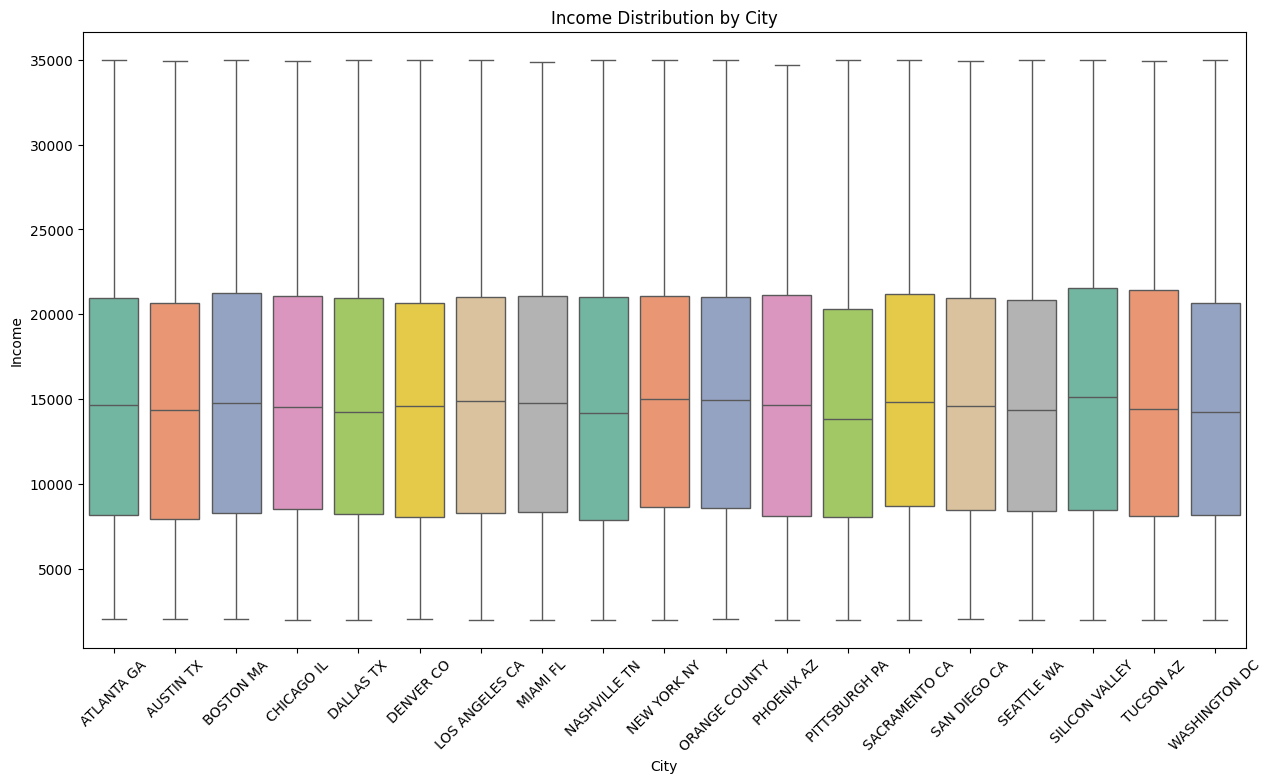

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="City", y="Income (USD/Month)", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Income Distribution by City")
plt.xlabel("City")
plt.ylabel("Income")
plt.show();

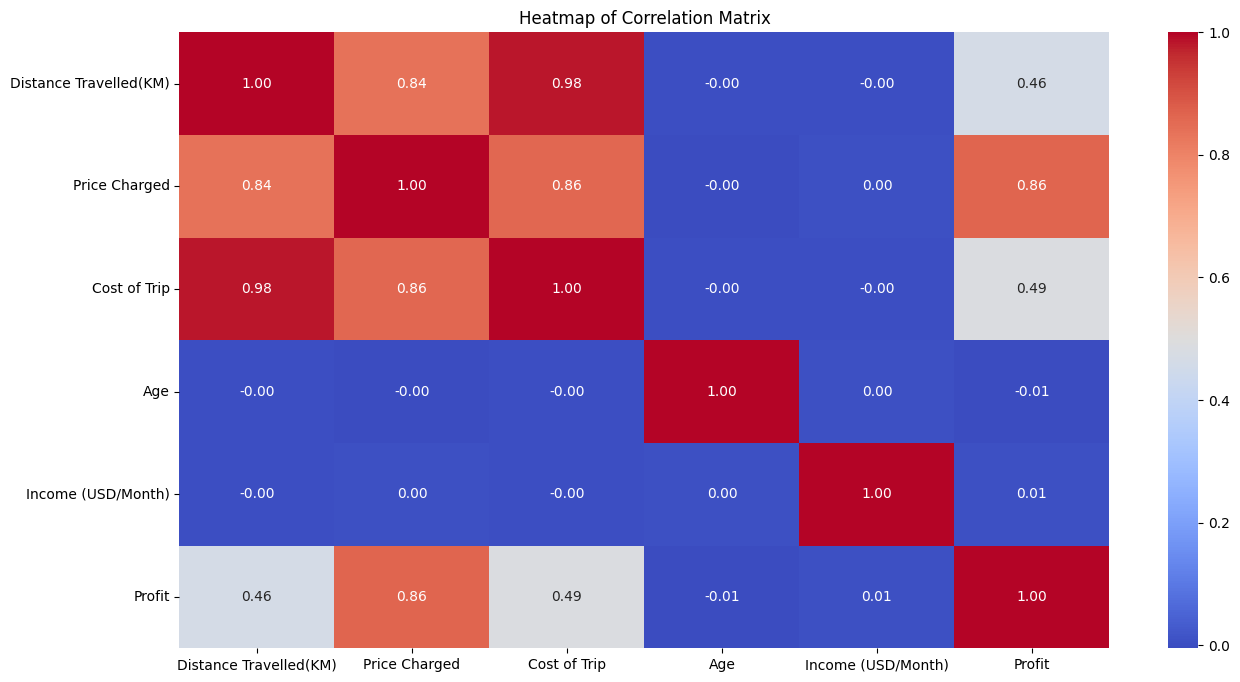

In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Create heatmap to show all variable relationship and leave the company
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(numeric_df.corr(), annot=True,fmt=".2f", cmap="coolwarm", cbar=True)
heatmap.set_title("Heatmap of Correlation Matrix");

In [ ]:
# Isolate the "Profit" column for both company.
Pink_Cab = df[df["Company"] == "Pink Cab"]["Profit"]
Yellow_Cab = df[df["Company"] == "Yellow Cab"]["Profit"]

# Find P Value
stats.ttest_ind(a=Pink_Cab, b=Yellow_Cab, equal_var=False)

TtestResult(statistic=-230.99551452746311, pvalue=0.0, df=313532.12464142457)

arket Penetration Hypothesis: Does the company with the highest number of users in cities with the largest populations generate more profit? This aims to analyze the correlation between the market penetration (in terms of users) of the cab companies and their profitability in densely populated cities.

Hypothesis:

Null Hypothesis (H0): There is NO significant difference in the profits generated by cab companies in cities with the largest populations, regardless of the number of users.

Alternative Hypothesis (H1): The company with the highest number of users in cities with the largest populations generates significantly more profit than the company with fewer users.

Significance Level - 5%

Find P-Value

In [ ]:
# Merge dataset
df_hypo2 = pd.merge(df, df_city, on="City")

# Identify the largest cities by population
largest_cities = df_city.nlargest(5, "Population")["City"]

# Isolate the data for the largest cities
largest_city_data = df_hypo2[df_hypo2["City"].isin(largest_cities)]

# Isolate profit data for the two companies
profit_pink_cab = largest_city_data[largest_city_data["Company"] == "Pink Cab"]["Profit"]
profit_yellow_cab = largest_city_data[largest_city_data["Company"] == "Yellow Cab"]["Profit"]

# Perform the t-test
stats.ttest_ind(a=profit_pink_cab, b=profit_yellow_cab, equal_var=False)

TtestResult(statistic=-218.89741242558824, pvalue=0.0, df=187858.54728451738)

In [ ]:
df

Date of Travel     Company           City  Distance Travelled(KM)  \
0          2016-01-08    Pink Cab     ATLANTA GA                   30.45   
1          2016-01-06    Pink Cab     ATLANTA GA                   28.62   
2          2016-01-02    Pink Cab     ATLANTA GA                    9.04   
3          2016-01-07    Pink Cab     ATLANTA GA                   33.17   
4          2016-01-03    Pink Cab     ATLANTA GA                    8.73   
...               ...         ...            ...                     ...   
359387     2018-01-08  Yellow Cab  WASHINGTON DC                    4.80   
359388     2018-01-04  Yellow Cab  WASHINGTON DC                    8.40   
359389     2018-01-05  Yellow Cab  WASHINGTON DC                   27.75   
359390     2018-01-05  Yellow Cab  WASHINGTON DC                    8.80   
359391     2018-01-02  Yellow Cab  WASHINGTON DC                   12.76   

        Price Charged  Cost of Trip Payment_Mode Gender  Age  \
0              370.95      313.6350         Card   Male   28   
1              358.52      334.8540         Card   Male   27   
2              125.20       97.6320         Cash   Male   53   
3              377.40      351.6020         Cash   Male   23   
4              114.62       97.7760         Card   Male   33   
...               ...           ...          ...    ...  ...   
359387          69.24       63.3600         Cash   Male   24   
359388         113.75      106.8480         Cash   Male   32   
359389         437.07      349.6500         Cash   Male   56   
359390         146.19      114.0480         Card   Male   32   
359391         191.58      177.6192         Card   Male   20   

        Income (USD/Month)   Profit  
0                    10813  57.3150  
1                     9237  23.6660  
2                    11242  27.5680  
3                    23327  25.7980  
4                     8536  16.8440  
...                    ...      ...  
359387               15651   5.8800  
359388                6528   6.9020  
359389                7966  87.4200  
359390                6423  32.1420  
359391               11284  13.9608  

[359392 rows x 11 columns]

In [ ]:
df["Month"] = df["Date of Travel"].dt.month

# Count occurrences for each month (1 to 12)
month_counts = df["Month"].value_counts().sort_index()

# Print results in a readable format
for month, count in month_counts.items():
    print(f"Month {month}: {count} trips")

Month 1: 23174 trips
Month 2: 18307 trips
Month 3: 21646 trips
Month 4: 21434 trips
Month 5: 23701 trips
Month 6: 24713 trips
Month 7: 27676 trips
Month 8: 31323 trips
Month 9: 36859 trips
Month 10: 40852 trips
Month 11: 42700 trips
Month 12: 47007 trips


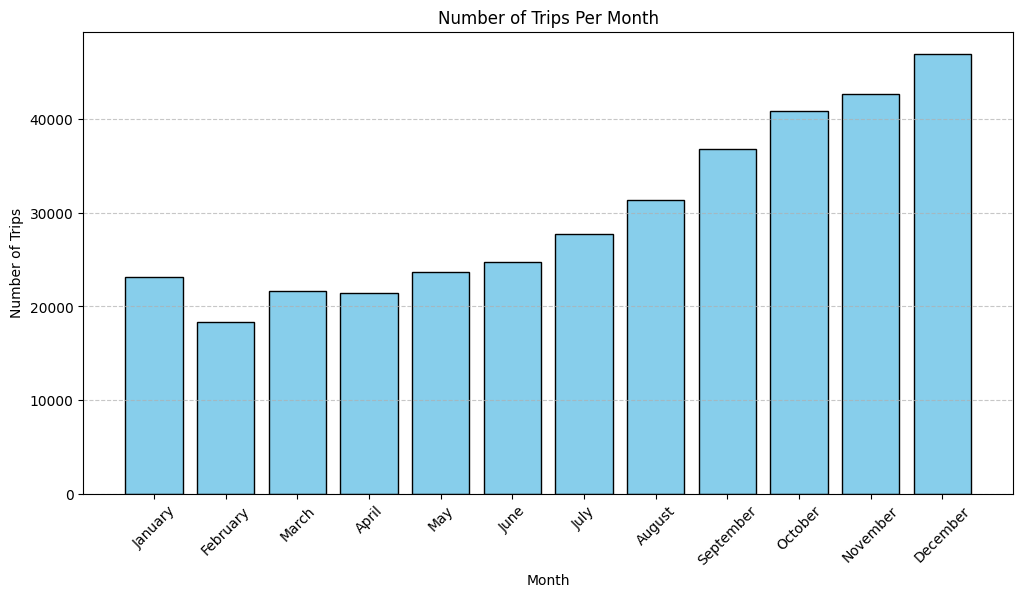

In [ ]:
df["Month"] = df["Date of Travel"].dt.month_name()
month_counts = df["Month"].value_counts().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(month_counts.index, month_counts.values, color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Number of Trips Per Month")
plt.xticks(rotation=45)  # Rotate month names for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [ ]:
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"])

# Extract the year from the date column
df["Year"] = df["Date of Travel"].dt.year

# Count the number of trips per year
yearly_counts = df["Year"].value_counts().sort_index()

# Print yearly trip counts
print(yearly_counts)

Year
2016    107319
2017    128510
2018    123563
Name: count, dtype: int64


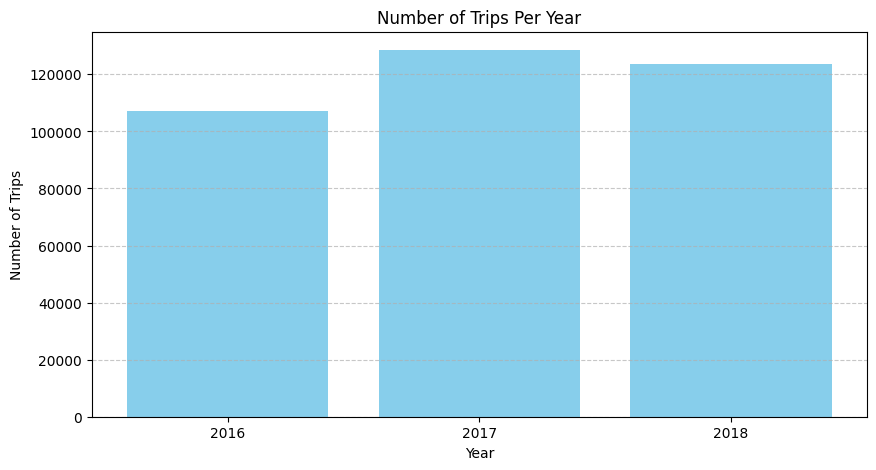

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(yearly_counts.index, yearly_counts.values, color="skyblue")
plt.xlabel("Year")
plt.ylabel("Number of Trips")
plt.title("Number of Trips Per Year")
plt.xticks(yearly_counts.index)  # Ensure all years are displayed
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
df

Date of Travel     Company           City  Distance Travelled(KM)  \
0          2016-01-08    Pink Cab     ATLANTA GA                   30.45   
1          2016-01-06    Pink Cab     ATLANTA GA                   28.62   
2          2016-01-02    Pink Cab     ATLANTA GA                    9.04   
3          2016-01-07    Pink Cab     ATLANTA GA                   33.17   
4          2016-01-03    Pink Cab     ATLANTA GA                    8.73   
...               ...         ...            ...                     ...   
359387     2018-01-08  Yellow Cab  WASHINGTON DC                    4.80   
359388     2018-01-04  Yellow Cab  WASHINGTON DC                    8.40   
359389     2018-01-05  Yellow Cab  WASHINGTON DC                   27.75   
359390     2018-01-05  Yellow Cab  WASHINGTON DC                    8.80   
359391     2018-01-02  Yellow Cab  WASHINGTON DC                   12.76   

        Price Charged  Cost of Trip Payment_Mode Gender  Age  \
0              370.95      313.6350         Card   Male   28   
1              358.52      334.8540         Card   Male   27   
2              125.20       97.6320         Cash   Male   53   
3              377.40      351.6020         Cash   Male   23   
4              114.62       97.7760         Card   Male   33   
...               ...           ...          ...    ...  ...   
359387          69.24       63.3600         Cash   Male   24   
359388         113.75      106.8480         Cash   Male   32   
359389         437.07      349.6500         Cash   Male   56   
359390         146.19      114.0480         Card   Male   32   
359391         191.58      177.6192         Card   Male   20   

        Income (USD/Month)   Profit    Month  Year  
0                    10813  57.3150  January  2016  
1                     9237  23.6660  January  2016  
2                    11242  27.5680  January  2016  
3                    23327  25.7980  January  2016  
4                     8536  16.8440  January  2016  
...                    ...      ...      ...   ...  
359387               15651   5.8800  January  2018  
359388                6528   6.9020  January  2018  
359389                7966  87.4200  January  2018  
359390                6423  32.1420  January  2018  
359391               11284  13.9608  January  2018  

[359392 rows x 13 columns]

Data saved successfully as taxi_data.xlsx


FileNotFoundError: [Errno 2] No such file or directory: 'your_file.csv'